In [1]:
# 导入所需库
import os
import pandas as pd
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 设置文件路径
folder_path = 'gov'
years = range(2015, 2025)
stopword_file = 'stopwords.txt'

# 读取停用词文件
with open(stopword_file, 'r', encoding='utf-8') as f:
    custom_stopwords = f.read().splitlines()

# 定义函数读取文件内容
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        return file.read()

In [3]:
# 循环读取文件并存储内容
documents = {}
for year in years:
    file_name = f'{year}.txt'
    file_path = os.path.join(folder_path, file_name)
    documents[year] = read_file(file_path)

# 进行文本预处理
def preprocess_text(text):
    tokens = jieba.lcut(text)                           # 使用 jieba 进行分词
    tokens = [word for word in tokens if word.isalpha()]
    filtered_tokens = [word for word in tokens if word not in custom_stopwords]
    return ' '.join(filtered_tokens)                    # 将分词后的内容用空格连接

preprocessed_documents = {year: preprocess_text(doc) for year, doc in documents.items()}

# 将文档转换为列表，保留年份信息用于后续分析
years_list = list(preprocessed_documents.keys())
texts_list = list(preprocessed_documents.values())

save_path = 'save/'

with open(save_path, 'w', encoding='utf-8', errors='ignore') as :
    
    

KeyboardInterrupt: 

In [20]:
# 计算TF-IDF
vectorizer = TfidfVectorizer(max_df=0.85, max_features=1000, stop_words=custom_stopwords)
X = vectorizer.fit_transform(texts_list)
feature_names = vectorizer.get_feature_names_out()

# 聚类分析
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_.tolist()

# 创建 DataFrame 并添加聚类信息
df = pd.DataFrame({'Year': years_list, 'Text': texts_list, 'Cluster': clusters})

# 提取每个文档的高频词
def extract_top_words(text, n=10):
    vector = vectorizer.transform([text])
    sorted_indices = vector.toarray().argsort()[0][::-1][:n]
    return [feature_names[i] for i in sorted_indices]

df['Top Words'] = df['Text'].apply(lambda x: extract_top_words(x))

# 使用 display 展示 DataFrame
display(df[['Year', 'Text', 'Top Words', 'Cluster']])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'daren', 'hadn', 'herse', 'himse', 'itse', 'lex', 'mayn', 'mightn', 'mon', 'mustn', 'myse', 'needn', 'oughtn', 'shan', '①①', '①②', '①③', '①④', '①⑤', '①⑥', '①⑦', '①⑧', '①⑨', '①ａ', '①ｂ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②ａ', '②ｂ', '②ｄ', '②ｅ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｆ', '③ｇ', '③ｈ', '④ａ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', '１２', 'ｌｉ', 'ｚｘｆｉｔｌ'] not in stop_words.
  warnings.warn(


,Year,Text,Top Words,Cluster
0,2015,代表 代表 市 人民政府 大会 作 工作 报告 请予 审议 请 政协委员 列席会议 同志 提...,"[启动, 切实, 集团, 方式, 扶贫, 路网, 执法, 高度重视, 减少, 资本]",2
1,2016,代表 代表 市 人民政府 大会 作 政府 工作 报告 请予 审议 请 政协委员 列席会议 同...,"[年均, 时期, 十三, 十一五, 扶贫, 五年, 旅游胜地, 小康社会, 管理体制, 启动]",4
2,2017,代表 代表 市 人民政府 大会 作 报告 请予 审议 请 政协委员 列席 人员 提出 意见 ...,"[扶贫, 启动, 注重, 狠抓, 合一, 效益, 互联网, 贫困村, 不断完善, 贫困户]",0
3,2018,代表 代表 市 人民政府 大会 作 工作 报告 请予 审议 请 政协委员 列席会议 同志 提...,"[扶贫, 万人次, 片区, 聚焦, 小镇, 贫困村, 第三批, 宜居, 华为, 比亚迪]",0
4,2019,代表 代表 市 人民政府 大会 报告 政府 工作 请予 审议 请 政协委员 列席会议 同志 ...,"[扶贫, 米粉, 高质量, 小镇, 低于, 旅游胜地, 公司, 康养, 贫困村, 依托]",0
5,2020,代表 代表 市 人民政府 大会 报告 政府 工作 请予 审议 请 政协委员 列席会议 同志 ...,"[扶贫, 高质量, 依托, 一流, 米粉, 旅游胜地, 十三, 聚焦, 小镇, 全域]",0
6,2021,代表 代表 市 第五届 人民政府 大会 报告 工作 请予 审议 请 政协委员 列席 人员 提...,"[世界级, 五年, 高质量, 时代, 年均, 红色, 全球, 一流, 医美, 里程]",3
7,2022,代表 代表 市 人民政府 大会 报告 工作 请予 审议 请 政协委员 列席 人员 提出 意见...,"[世界级, 工作组, 高质量, 关系, 湘江, 底线, 长征, 办事, 通办, 获评]",3
8,2023,代表 代表 市 人民政府 大会 报告 政府 工作 请予 审议 请 市政协 委员 列席会议 同...,"[世界级, 高质量, 获评, 科技成果, 青年, 二十大, 花卉苗木, 更大, 政治, 特新]",1
9,2024,代表 代表 市 人民政府 大会 报告 政府 工作 请予 审议 请 市政协 委员 列席会议 同...,"[世界级, 奋力, 高质量, 获评, 认定, 底线, 营商, 制造业, 防范, 经典]",1


Cluster 0 words:
['扶贫', '贫困村', '小镇', '旅游胜地', '高质量', '片区', '依托', '狠抓', '万人次', '米粉']


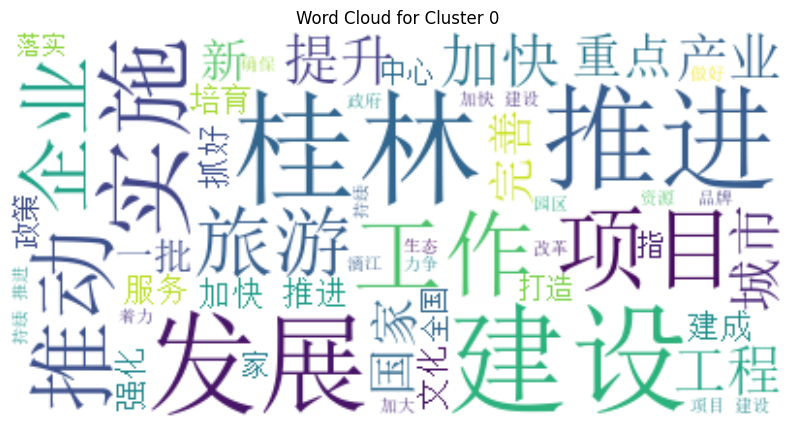


Cluster 1 words:
['世界级', '高质量', '获评', '奋力', '花卉苗木', '文旅', '政治', '认定', '底线', '工厂']


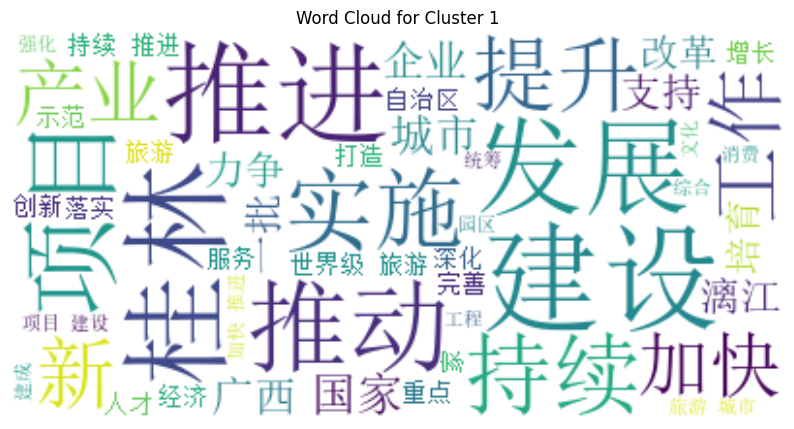


Cluster 2 words:
['启动', '切实', '集团', '方式', '扶贫', '路网', '执法', '高度重视', '减少', '资本']


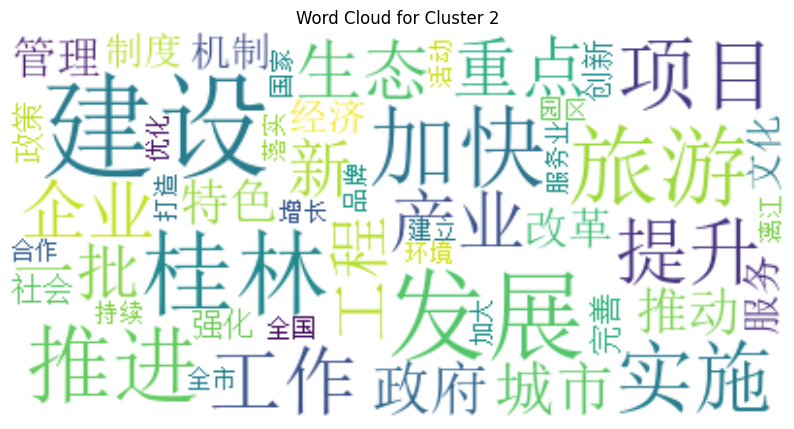


Cluster 3 words:
['世界级', '高质量', '五年', '工作组', '时代', '红色', '湘江', '党代会', '年均', '疫情']


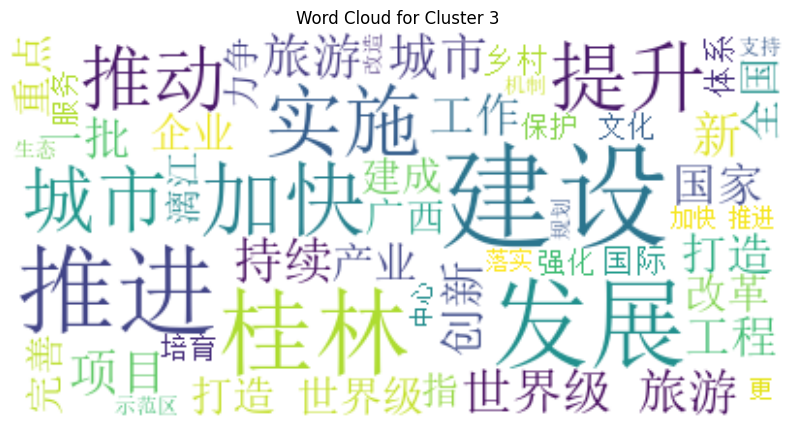


Cluster 4 words:
['年均', '时期', '十三', '十一五', '扶贫', '五年', '旅游胜地', '小康社会', '管理体制', '启动']


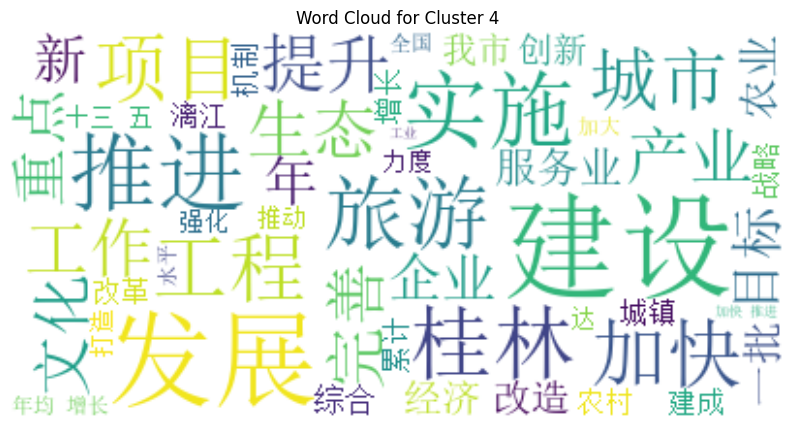

In [22]:
# 高频词提取与可视化
def plot_wordcloud(cluster_number):
    cluster_text = ' '.join(df[df['Cluster'] == cluster_number]['Text'])
    wordcloud = WordCloud(
        stopwords=custom_stopwords,
        max_words=50,
        background_color='white',
        font_path='C:\\Windows\\Fonts\\simsun.ttc'  # 请更改为你的字体文件路径
    ).generate(cluster_text)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_number}')
    plt.show()

# 显示每个聚类的高频词和词云
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i} words:")
    print([terms[ind] for ind in kmeans.cluster_centers_.argsort()[:, ::-1][i, :10]])  # Top 10 words per cluster
    plot_wordcloud(i)
    print()